In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt

Saving challenge1-data-science-main.zip to challenge1-data-science-main (1).zip


In [5]:
import zipfile
import os

zip_path = '/content/challenge1-data-science-main.zip'
extract_path = '/content/desafio_allure'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifique o conteúdo extraído
os.listdir(extract_path)

['challenge1-data-science-main']

In [6]:
# Ver o que tem na raiz da extração
import os

for root, dirs, files in os.walk('/content/desafio_allure'):
    print(f"\n📁 Pasta: {root}")
    for f in files:
        print(f"  📄 {f}")


📁 Pasta: /content/desafio_allure

📁 Pasta: /content/desafio_allure/challenge1-data-science-main
  📄 AluraStoreBr.ipynb

📁 Pasta: /content/desafio_allure/challenge1-data-science-main/base-de-dados-challenge-1
  📄 loja_2.csv
  📄 loja_1.csv
  📄 loja_3.csv
  📄 loja_4.csv


In [7]:
import pandas as pd
import os

# Caminho correto para os arquivos CSV
dados_path = '/content/desafio_allure/challenge1-data-science-main/base-de-dados-challenge-1'

# Leitura dos dados das quatro lojas
loja_1 = pd.read_csv(os.path.join(dados_path, 'loja_1.csv'))
loja_2 = pd.read_csv(os.path.join(dados_path, 'loja_2.csv'))
loja_3 = pd.read_csv(os.path.join(dados_path, 'loja_3.csv'))
loja_4 = pd.read_csv(os.path.join(dados_path, 'loja_4.csv'))

# Verificando rapidamente a estrutura de uma das tabelas
loja_1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [8]:
def analisar_loja(df, nome_loja):
    print(f"\n Análise da {nome_loja}")

    # Criando coluna de faturamento (1 unidade por venda)
    df['Faturamento'] = df['Preço']  # 1 unidade por venda
    faturamento_total = df['Faturamento'].sum()
    print(f" Faturamento Total: R${faturamento_total:,.2f}")

    # Categoria mais popular
    categoria_popular = df['Categoria do Produto'].value_counts().idxmax()
    print(f" Categoria Mais Popular: {categoria_popular}")

    # Média de avaliação
    media_avaliacao = df['Avaliação da compra'].mean()
    print(f" Média de Avaliação: {media_avaliacao:.2f}")

    # Produto mais vendido
    produto_mais_vendido = df['Produto'].value_counts().idxmax()
    print(f" Produto Mais Vendido: {produto_mais_vendido}")

    # Produto menos vendido
    produto_menos_vendido = df['Produto'].value_counts().idxmin()
    print(f" Produto Menos Vendido: {produto_menos_vendido}")

    # Custo médio do frete
    frete_medio = df['Frete'].mean()
    print(f" Custo Médio do Frete: R${frete_medio:.2f}")

In [9]:
analisar_loja(loja_1, "Loja 1")
analisar_loja(loja_2, "Loja 2")
analisar_loja(loja_3, "Loja 3")
analisar_loja(loja_4, "Loja 4")


 Análise da Loja 1
 Faturamento Total: R$1,534,509.12
 Categoria Mais Popular: moveis
 Média de Avaliação: 3.98
 Produto Mais Vendido: Micro-ondas
 Produto Menos Vendido: Headset
 Custo Médio do Frete: R$34.69

 Análise da Loja 2
 Faturamento Total: R$1,488,459.06
 Categoria Mais Popular: moveis
 Média de Avaliação: 4.04
 Produto Mais Vendido: Iniciando em programação
 Produto Menos Vendido: Jogo de tabuleiro
 Custo Médio do Frete: R$33.62

 Análise da Loja 3
 Faturamento Total: R$1,464,025.03
 Categoria Mais Popular: moveis
 Média de Avaliação: 4.05
 Produto Mais Vendido: Kit banquetas
 Produto Menos Vendido: Blocos de montar
 Custo Médio do Frete: R$33.07

 Análise da Loja 4
 Faturamento Total: R$1,384,497.58
 Categoria Mais Popular: moveis
 Média de Avaliação: 4.00
 Produto Mais Vendido: Cama box
 Produto Menos Vendido: Guitarra
 Custo Médio do Frete: R$31.28


In [10]:
# Função para análise de uma loja
def analisar_loja(df, nome_loja):
    resultados = {}

    # Faturamento total (1 unidade por venda)
    df['Faturamento'] = df['Preço']
    resultados['Faturamento Total'] = df['Faturamento'].sum()

    # Categoria mais popular
    resultados['Categoria Mais Popular'] = df['Categoria do Produto'].value_counts().idxmax()

    # Média de avaliação
    resultados['Média Avaliação'] = df['Avaliação da compra'].mean()

    # Produto mais vendido
    resultados['Produto Mais Vendido'] = df['Produto'].value_counts().idxmax()

    # Produto menos vendido
    resultados['Produto Menos Vendido'] = df['Produto'].value_counts().idxmin()

    # Custo médio do frete
    resultados['Custo Médio Frete'] = df['Frete'].mean()

    return resultados

In [11]:
# Armazenar os resultados de todas as lojas
resumo_lojas = {
    'Loja 1': analisar_loja(loja_1, 'Loja 1'),
    'Loja 2': analisar_loja(loja_2, 'Loja 2'),
    'Loja 3': analisar_loja(loja_3, 'Loja 3'),
    'Loja 4': analisar_loja(loja_4, 'Loja 4'),
}

In [12]:
import pandas as pd

df_resumo = pd.DataFrame(resumo_lojas).T  # .T = transpor para deixar lojas nas linhas
display(df_resumo)

,Faturamento Total,Categoria Mais Popular,Média Avaliação,Produto Mais Vendido,Produto Menos Vendido,Custo Médio Frete
Loja 1,1534509.12,moveis,3.976685,Micro-ondas,Headset,34.691805
Loja 2,1488459.06,moveis,4.037304,Iniciando em programação,Jogo de tabuleiro,33.621941
Loja 3,1464025.03,moveis,4.048326,Kit banquetas,Blocos de montar,33.074464
Loja 4,1384497.58,moveis,3.995759,Cama box,Guitarra,31.278997


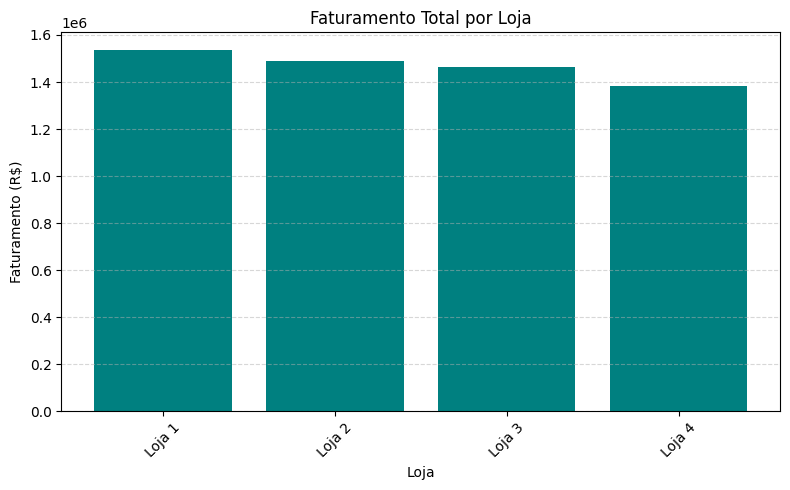

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(df_resumo.index, df_resumo['Faturamento Total'], color='teal')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

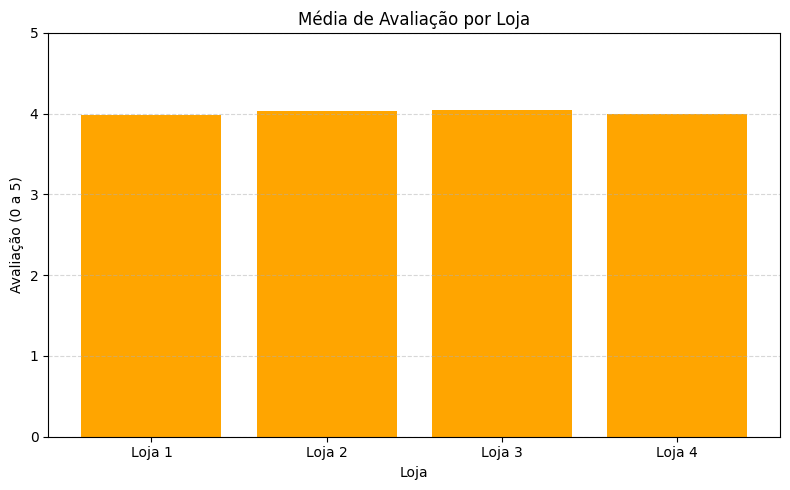

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(df_resumo.index, df_resumo['Média Avaliação'], color='orange')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Avaliação (0 a 5)')
plt.xlabel('Loja')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

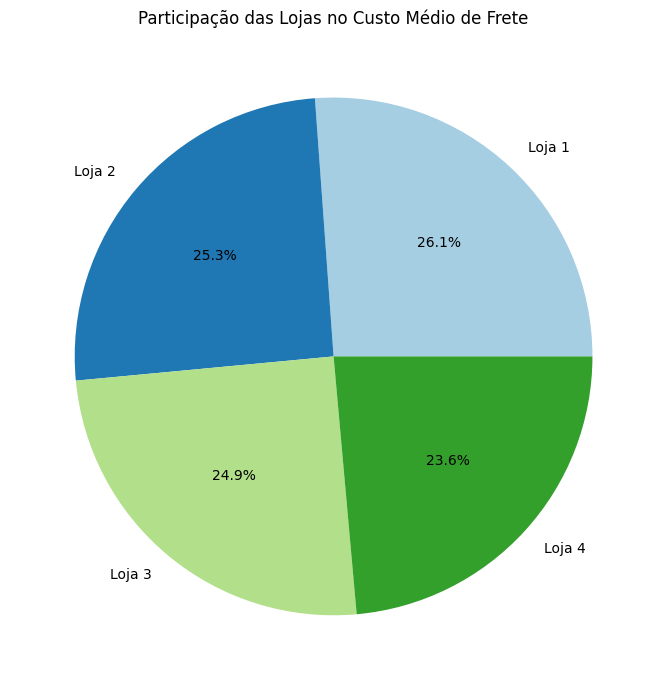

In [16]:
plt.figure(figsize=(7, 7))
plt.pie(df_resumo['Custo Médio Frete'],
        labels=df_resumo.index,
        autopct='%1.1f%%',
        colors=plt.cm.Paired.colors)
plt.title('Participação das Lojas no Custo Médio de Frete')
plt.tight_layout()
plt.show()

In [17]:
df_resumo

,Faturamento Total,Categoria Mais Popular,Média Avaliação,Produto Mais Vendido,Produto Menos Vendido,Custo Médio Frete
Loja 1,1534509.12,moveis,3.976685,Micro-ondas,Headset,34.691805
Loja 2,1488459.06,moveis,4.037304,Iniciando em programação,Jogo de tabuleiro,33.621941
Loja 3,1464025.03,moveis,4.048326,Kit banquetas,Blocos de montar,33.074464
Loja 4,1384497.58,moveis,3.995759,Cama box,Guitarra,31.278997
